In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNNC
import math
import warnings
warnings.filterwarnings('ignore')

In [99]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (1).xlsx


In [100]:
df = pd.read_excel('data.xlsx')
# df = df.dropna(axis=1)
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [101]:
# count the number of rows and columns in dataset:
df.shape

(569, 32)

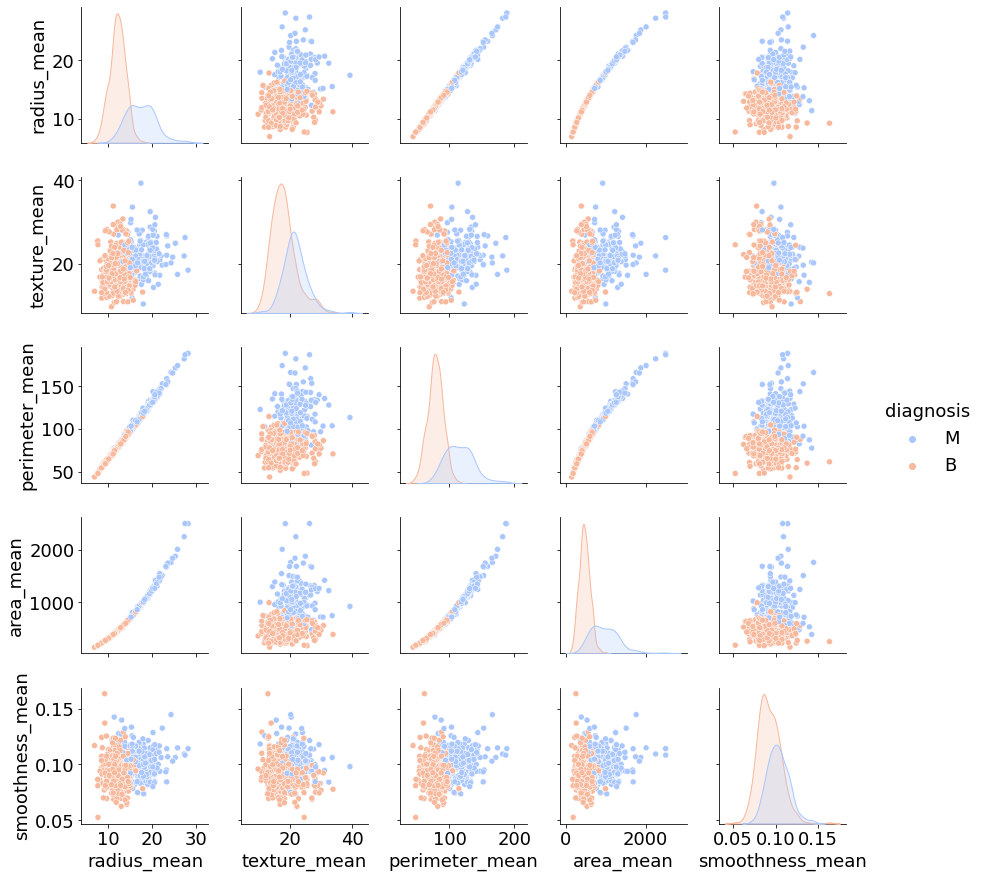

In [102]:
sns.pairplot(df,hue = 'diagnosis', palette= 'coolwarm', vars = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean'])

In [103]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [104]:
# count the number of N/A values in each columns:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [105]:
# count the number of empty values in each columns:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [106]:
# drop the columns with all the missing values:
df = df.dropna(axis = 1)
df.shape

(569, 32)

In [107]:
# Drop id columns
df = df.drop(labels=['id'], axis=1)

In [108]:
# statistical measures about the data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [109]:
# Get the count of the number of Malignant(M) or Benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

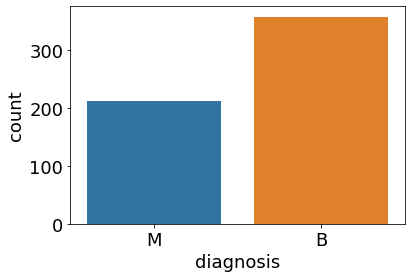

In [110]:
# visualize the count:
sns.countplot(df['diagnosis'], label = 'count')

In [111]:
# look at the data types to see which columns need to be encoded:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79c50b6ad0>,
      dtype=object)

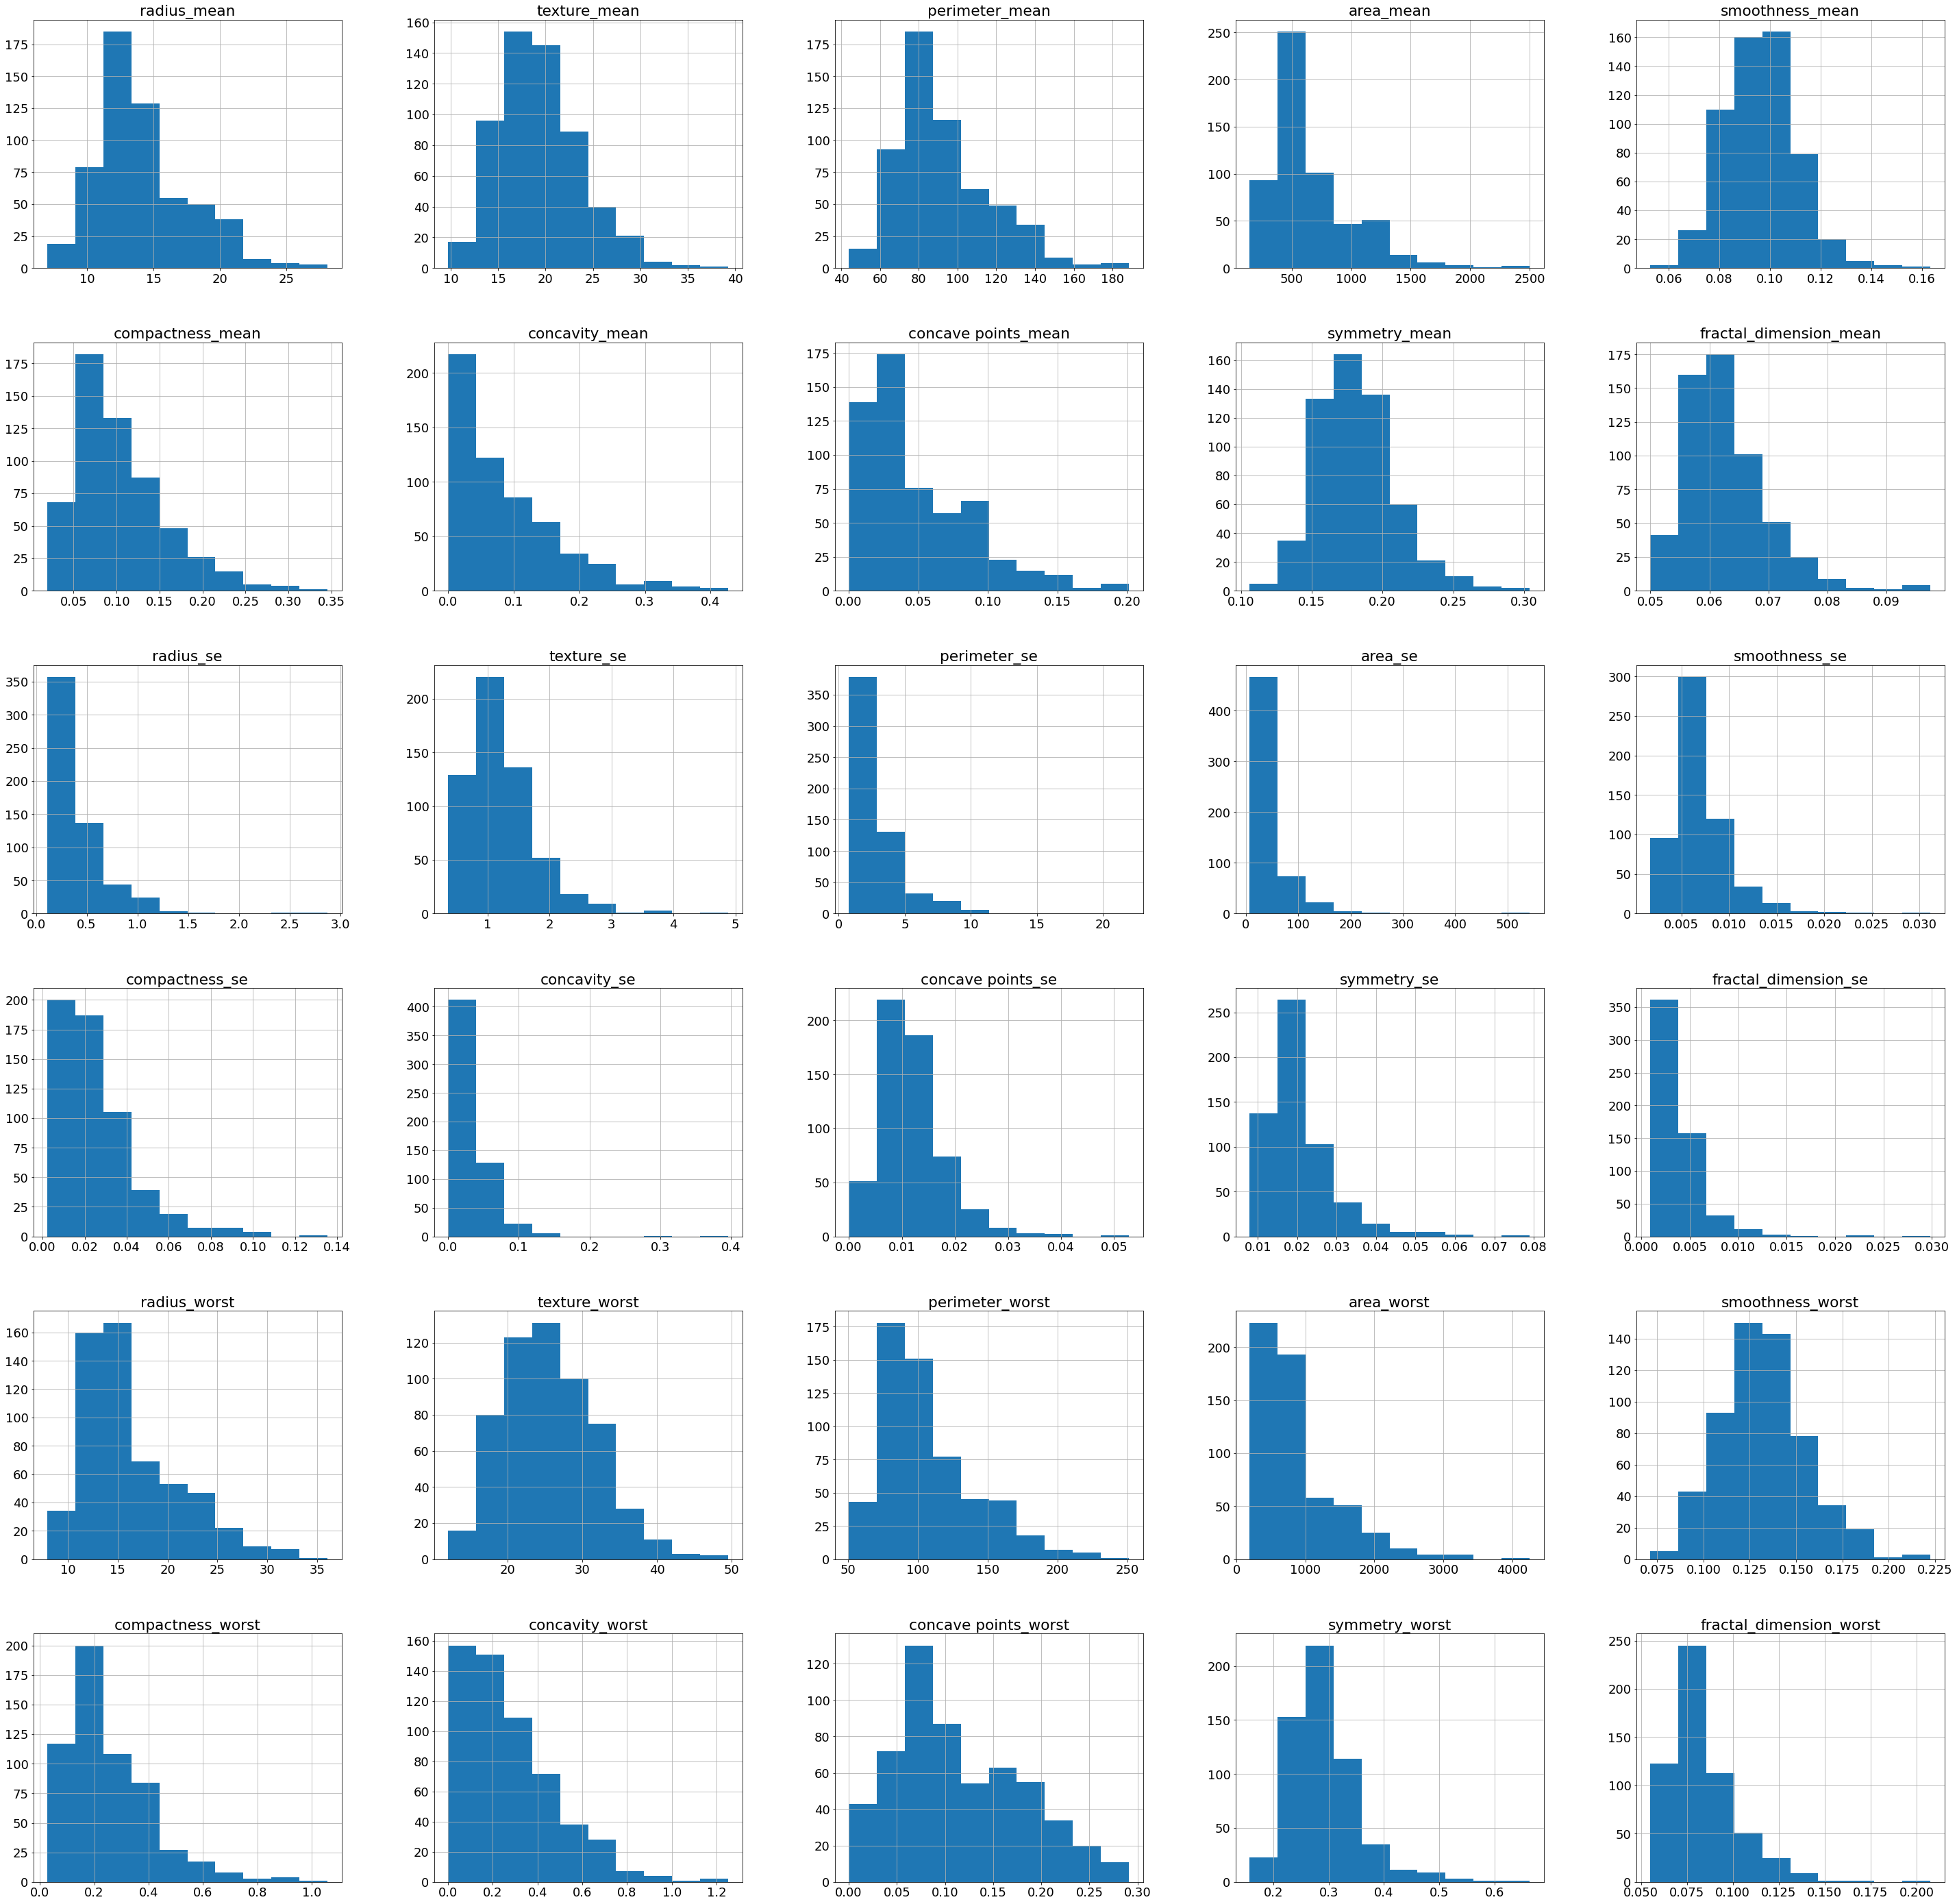

In [112]:
df.hist(bins=10, figsize=(50, 50))

In [113]:
# Rename the diagnosis data to labels:
df = df.rename(columns = {'diagnosis' : 'label'})
print(df.dtypes)

label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [114]:
df.pivot_table(list(df.columns), ['label'], aggfunc='median')  # Pivot

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,concavity_se,concavity_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst,perimeter_mean,perimeter_se,perimeter_worst,radius_mean,radius_se,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,458.4,19.630,547.4,0.07529,0.01631,0.16980,0.02344,0.009061,0.07431,0.03709,0.018400,0.1412,0.061540,0.002808,0.07712,78.18,1.8510,86.92,12.200,0.2575,13.35,0.09076,0.006530,0.12540,0.1714,0.01909,0.2687,17.39,1.1080,22.820
M,932.0,58.455,1303.0,0.13235,0.02859,0.35635,0.08628,0.014205,0.18200,0.15135,0.037125,0.4049,0.061575,0.003739,0.08760,114.20,3.6795,138.00,17.325,0.5472,20.59,0.10220,0.006209,0.14345,0.1899,0.01770,0.3103,21.46,1.1025,28.945


In [115]:
df.groupby('label').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [116]:
df_corr = df.drop(labels=['label'],axis = 1)
df_corr = df_corr.corr()
df_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


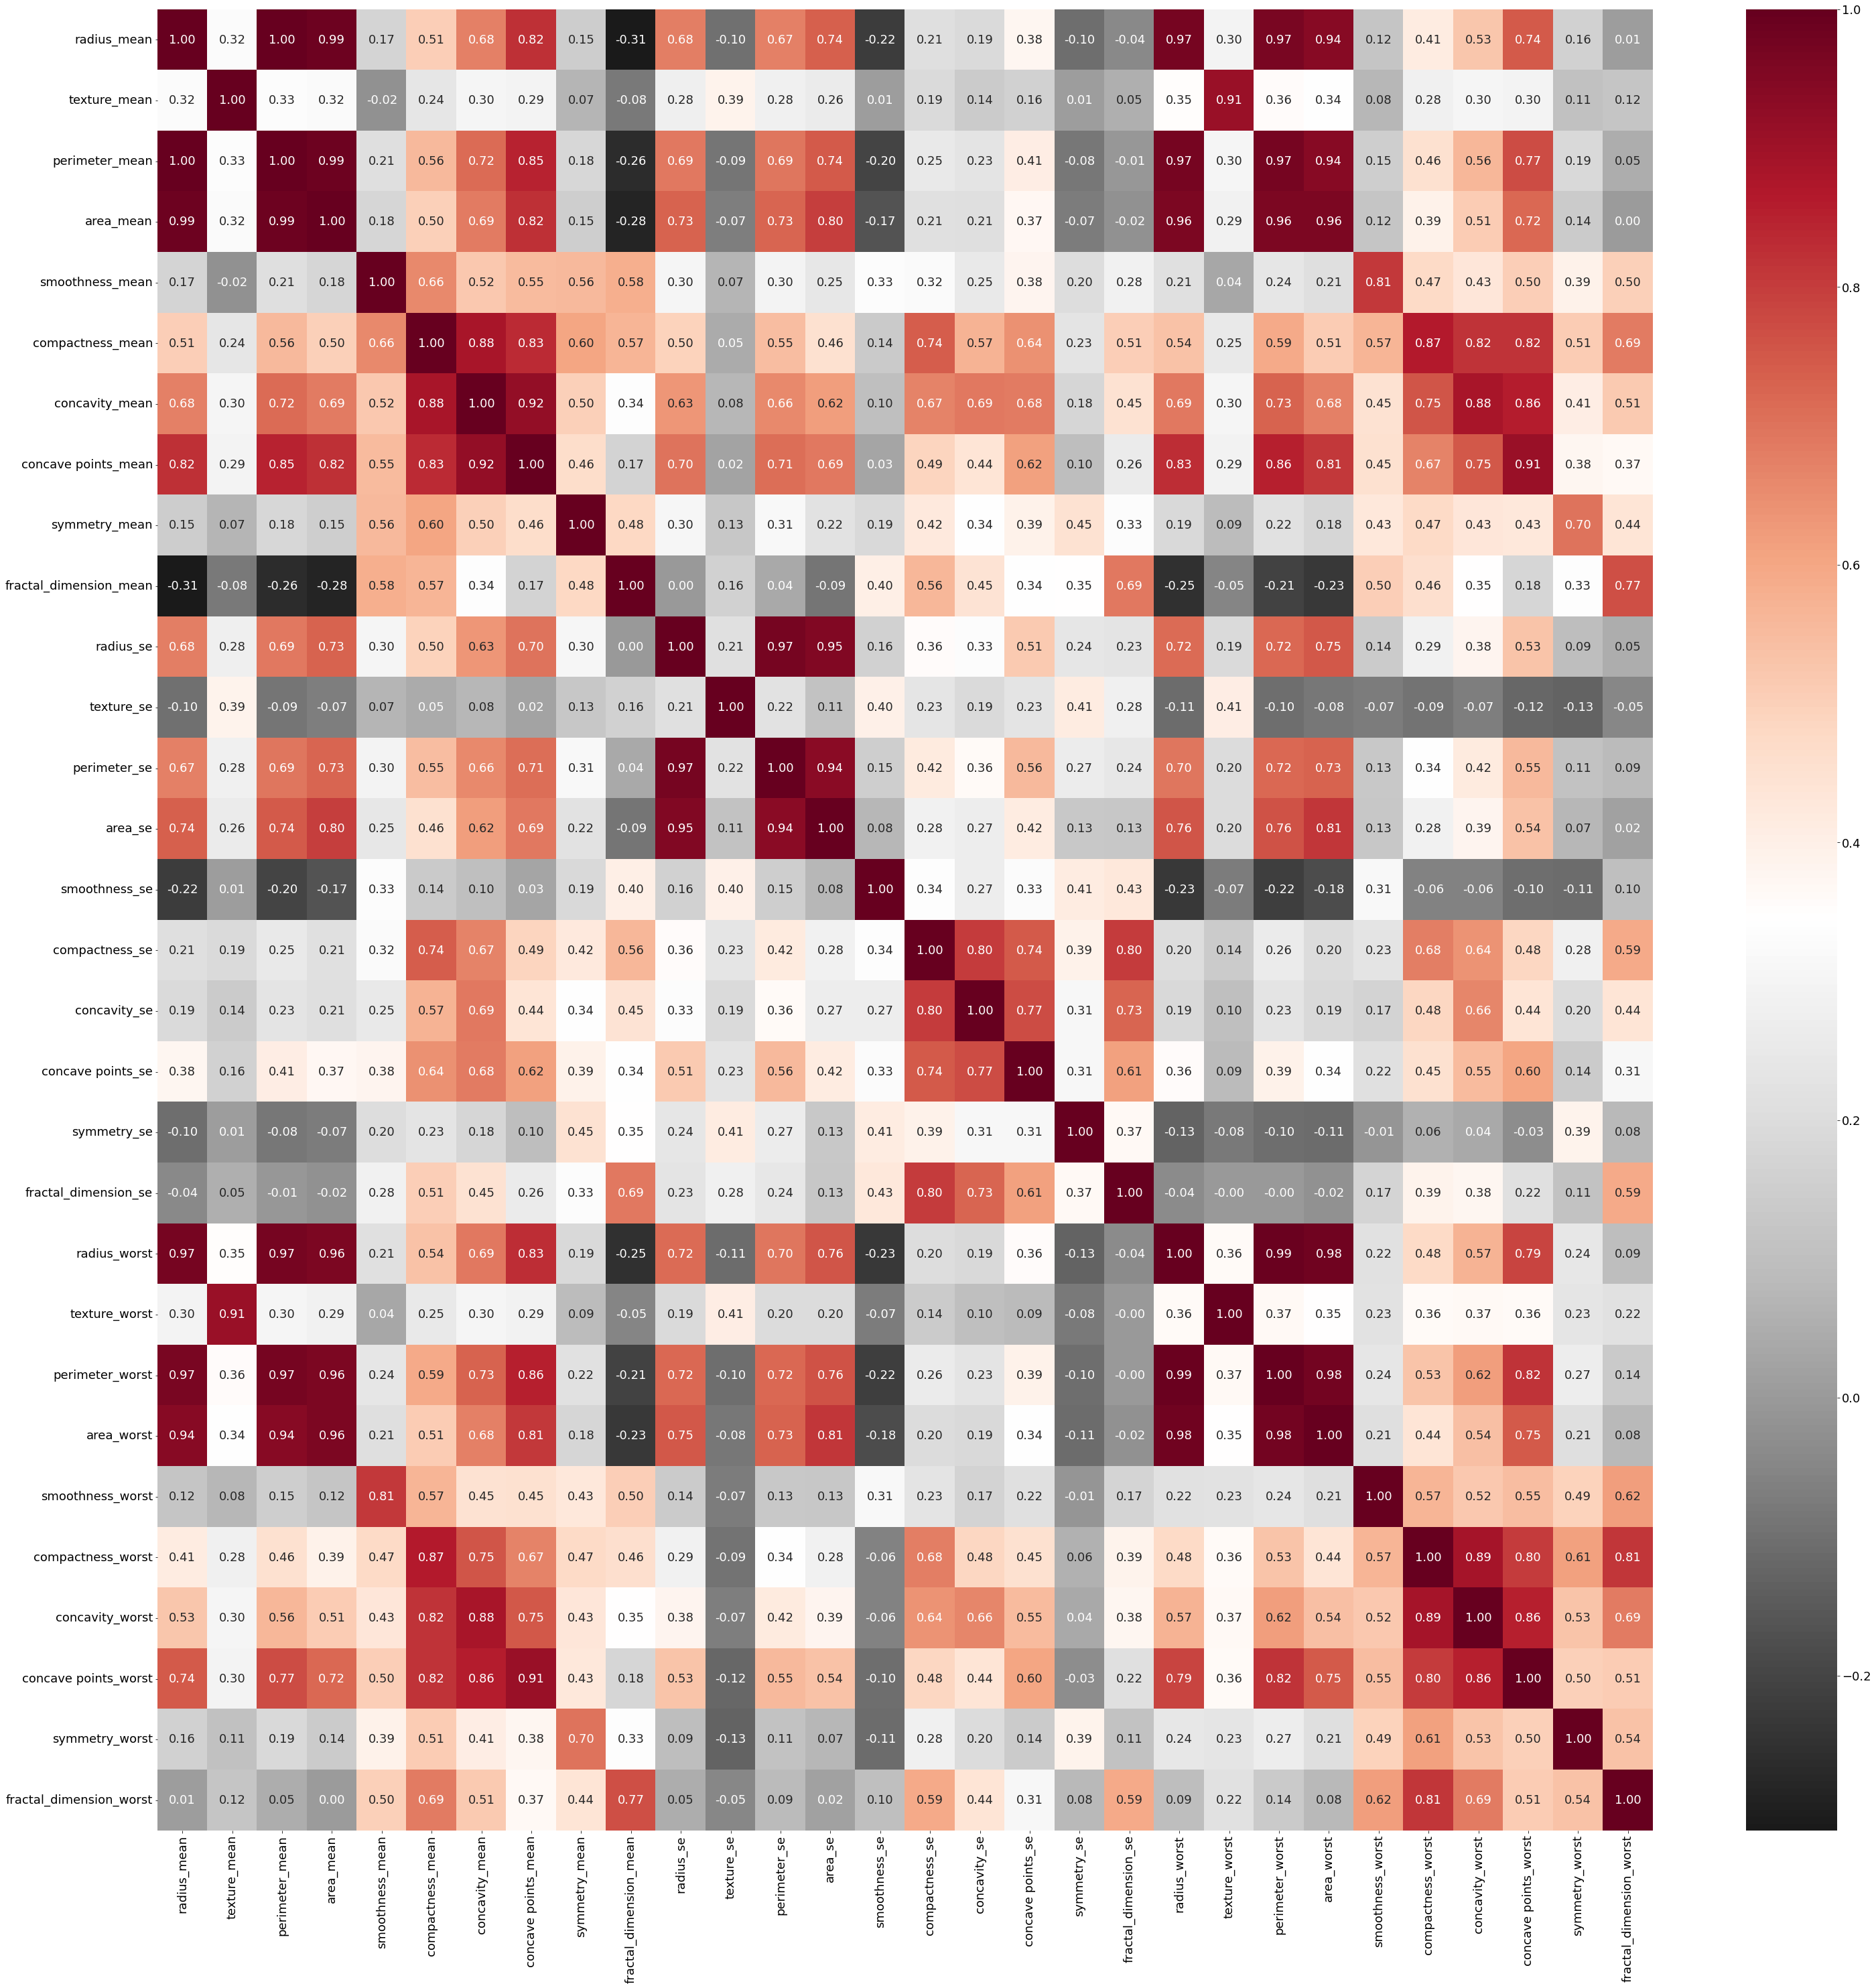

In [117]:
plt.subplots(figsize=(50, 50));
plt.rcParams.update({'font.size': 18})
sns.heatmap(df_corr, annot=True, cmap=plt.cm.RdGy_r, fmt=".2f") 

In [118]:
# define the dependent variable that need to predict(label)
y = df['label'].values
print(np.unique(y))

['B' 'M']


In [119]:
# Encoding categorical data from text(B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M = 1 and B = 0
print(labelencoder.classes_)
print(np.unique(Y))

keys = labelencoder.classes_
values = labelencoder.transform(labelencoder.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

['B' 'M']
[0 1]
{'B': 0, 'M': 1}


In [120]:
# std_scaler = StandardScaler()
# std_scaler.fit(X)
# X = std_scaler.transform(X)

#scale / normalize the values to bring them into similar range:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define x and normalize / scale value:
# define the independent variables, Drop label and ID, and normalize other data:
origin_X  = df.drop(labels=['label'],axis = 1)

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(origin_X)
X = minmax_scaler.transform(origin_X)

print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [121]:
# Split data into training and testing data to verify accuracy after fitting the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=42)
print('Shape of training data is: ', x_train.shape)
print('Shape of testing data is: ', x_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


In [122]:
def check_k_knn():
  results_knnc = []
  results_mean_knnc = []

  for i in range(1,101):
    kfold = model_selection.KFold(n_splits=10, random_state=12, shuffle=True)
    cv_results = model_selection.cross_val_score(KNNC(i), X, Y, cv=kfold, scoring='accuracy')
    results_knnc.append(cv_results)
    results_mean_knnc.append(cv_results.mean())

    msg = 'Accuracy Score with k = %i: %f'% (i, cv_results.mean())
    print(msg)
  max_score = max(results_mean_knnc)
  ind_of_max = results_mean_knnc.index(max_score)
  print('==============================')
  print('Max score:', max_score)
  print('K of max score:', ind_of_max + 1)

In [123]:
check_k_knn()

Accuracy Score with k = 1: 0.950815
Accuracy Score with k = 2: 0.961372
Accuracy Score with k = 3: 0.968358
Accuracy Score with k = 4: 0.970144
Accuracy Score with k = 5: 0.966604
Accuracy Score with k = 6: 0.968390
Accuracy Score with k = 7: 0.970081
Accuracy Score with k = 8: 0.970144
Accuracy Score with k = 9: 0.966604
Accuracy Score with k = 10: 0.970144
Accuracy Score with k = 11: 0.971898
Accuracy Score with k = 12: 0.968390
Accuracy Score with k = 13: 0.973653
Accuracy Score with k = 14: 0.966635
Accuracy Score with k = 15: 0.970144
Accuracy Score with k = 16: 0.968390
Accuracy Score with k = 17: 0.968390
Accuracy Score with k = 18: 0.964850
Accuracy Score with k = 19: 0.964850
Accuracy Score with k = 20: 0.964850
Accuracy Score with k = 21: 0.966604
Accuracy Score with k = 22: 0.964850
Accuracy Score with k = 23: 0.963095
Accuracy Score with k = 24: 0.961341
Accuracy Score with k = 25: 0.959586
Accuracy Score with k = 26: 0.957832
Accuracy Score with k = 27: 0.959586
Accuracy S

In [124]:
def check_n_dtrees_rdfc():
  results_rdfc = []
  results_mean_rdfc = []

  for i in range(1,101):
    kfold = model_selection.KFold(n_splits=10, random_state=12, shuffle=True)
    cv_results = model_selection.cross_val_score(RandomForestClassifier(n_estimators=i, random_state=12), X, Y, cv=kfold, scoring='accuracy')
    results_rdfc.append(cv_results)
    results_mean_rdfc.append(cv_results.mean())

    msg = 'Accuracy Score with n = %i: %f' % (i, cv_results.mean())
    print(msg)
  max_score = max(results_mean_rdfc)
  ind_of_max = results_mean_rdfc.index(max_score)
  print('===============================')
  print('Max score:', max_score)
  print('number of trees:', ind_of_max + 1)

In [125]:
check_n_dtrees_rdfc()

Accuracy Score with n = 1: 0.913847
Accuracy Score with n = 2: 0.922682
Accuracy Score with n = 3: 0.938471
Accuracy Score with n = 4: 0.945489
Accuracy Score with n = 5: 0.943672
Accuracy Score with n = 6: 0.948935
Accuracy Score with n = 7: 0.954198
Accuracy Score with n = 8: 0.950721
Accuracy Score with n = 9: 0.947180
Accuracy Score with n = 10: 0.948966
Accuracy Score with n = 11: 0.945457
Accuracy Score with n = 12: 0.945457
Accuracy Score with n = 13: 0.950689
Accuracy Score with n = 14: 0.948966
Accuracy Score with n = 15: 0.950721
Accuracy Score with n = 16: 0.950721
Accuracy Score with n = 17: 0.950721
Accuracy Score with n = 18: 0.950721
Accuracy Score with n = 19: 0.950752
Accuracy Score with n = 20: 0.948966
Accuracy Score with n = 21: 0.950752
Accuracy Score with n = 22: 0.948966
Accuracy Score with n = 23: 0.948966
Accuracy Score with n = 24: 0.947212
Accuracy Score with n = 25: 0.952475
Accuracy Score with n = 26: 0.956015
Accuracy Score with n = 27: 0.955984
Accuracy S

In [126]:
# Cross validate classification
def cv_model_cf(X):
    models_cf = [('DecisionTreeClassifier', DecisionTreeClassifier(random_state=12)),
                 ('GaussianNB', GaussianNB()),
                 ('RandomForestClassifier', RandomForestClassifier(n_estimators=49,random_state=12)),
                 ('SupportVectorClassifier', SVC(random_state=12)),
                 ('LogisticRegression', LogisticRegression()),
                 ('KNN', KNNC(13))]
    results_cf = []
    names_cf = []
    print()
    for name, model in models_cf:
        kfold = model_selection.KFold(n_splits=10, random_state=12, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
        results_cf.append(cv_results)
        names_cf.append(name)
        msg = "Accuracy Score - %s: %f" % (name, cv_results.mean())
        print(msg)

In [127]:
cv_model_cf(X)


Accuracy Score - DecisionTreeClassifier: 0.924405
Accuracy Score - GaussianNB: 0.936717
Accuracy Score - RandomForestClassifier: 0.968358
Accuracy Score - SupportVectorClassifier: 0.978947
Accuracy Score - LogisticRegression: 0.968390
Accuracy Score - KNN: 0.973653


In [128]:
cv_model_cf(origin_X)


Accuracy Score - DecisionTreeClassifier: 0.924405
Accuracy Score - GaussianNB: 0.938471
Accuracy Score - RandomForestClassifier: 0.968358
Accuracy Score - SupportVectorClassifier: 0.915727
Accuracy Score - LogisticRegression: 0.941980
Accuracy Score - KNN: 0.934994


In [129]:
# # Using DecisionTreeClassifier model
# dtc_model = DecisionTreeClassifier(random_state=12)
# dtc_model.fit(x_train, y_train)
# prediction = dtc_model.predict(x_test)

# # Using Gaussian Navie Bayes model
# gnb_model = GaussianNB()
# gnb_model.fit(x_train, y_train)
# prediction = gnb_model.predict(x_test)

# # Using Random Forest Classifier model
# rfc_model = RandomForestClassifier(random_state=12)
# rfc_model.fit(x_train, y_train)
# prediction = gnb_model.predict(x_test)

# # Using Support Vector Classifier model
# svc_model = SVC(random_state=12)
# svc_model.fit(x_train, y_train)
# prediction = svc_model.predict(x_test)

# # Using Logistic Regression model
# lr_model = LogisticRegression()
# lr_model.fit(x_train, y_train)
# prediction = lr_model.predict(x_test)

# # Using K Nearest Neighbors model
# knnc_model = KNNC(13)
# knnc_model.fit(x_train, y_train)
# prediction = knnc_model.predict(x_test)

#model = LogisticRegression()
#model = KNNC(13)
model = SVC(random_state=12)

# training model using Training data
model.fit(x_train, y_train)

SVC(random_state=12)

In [130]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

print('Accuracy on training data = ', training_data_accuracy)


# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

print('Accuracy on test data = ', test_data_accuracy)

# f1 score on training data
training_data_f1_score = f1_score(y_train, x_train_prediction)
# f1 score on test data
test_data_f1_score = f1_score(y_test, x_test_prediction)

print('F1 score on training data = ', training_data_f1_score)
print('F1 score on test data = ', test_data_f1_score)

Accuracy on training data =  0.9835680751173709
Accuracy on test data =  0.9790209790209791
F1 score on training data =  0.9774919614147911
F1 score on test data =  0.9719626168224299


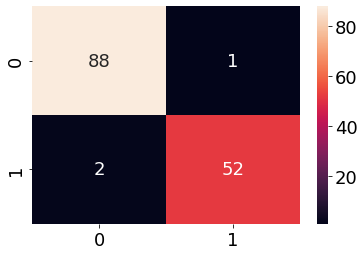

In [131]:
# Predicting the Test set results:
y_pred = model.predict(x_test)
# print(y_pred)
y_pred = (y_pred > 0.5)
# print(y_pred)
# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

In [132]:
print('Input:', X[20])
print('Label:', Y[20])
prediction = model.predict([X[20]])
print('Prediction:', prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')
else:
  print('The Breast Cancer is Benign')

Input: [0.2886554  0.20290835 0.28912998 0.15970308 0.49535073 0.33010245
 0.10702905 0.15457256 0.45808081 0.38226622 0.02668839 0.08563914
 0.0294963  0.01469561 0.08104157 0.12563463 0.04287879 0.12293995
 0.12520403 0.05286541 0.23372465 0.22574627 0.22750137 0.10944259
 0.39642079 0.24285201 0.15095847 0.25027491 0.31914055 0.17571822]
Label: 0
Prediction: [0]
The Breast Cancer is Benign
